## Necessary Imports

In [38]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold

from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, recall_score, precision_score

import warnings
warnings.filterwarnings('ignore')

## Reading files

In [37]:

i_data = pd.read_csv("C:/Users/Arkaprabha_B/Desktop/train_data.csv")
t_data = pd.read_csv("C:/Users/Arkaprabha_B/Desktop/test_data.csv")

## Summary of Train Data

In [39]:
i_data.describe()
print(i_data.shape)

(31587, 18)


In [40]:
i_data.head(5)

,index,age,working_sector,financial_weight,qualification,years_of_education,tax_paid,loan_taken,marital_status,occupation,relationship,ethnicity,gender,gain,loss,working_hours,country,target
0,1,39.0,state,77516.0,Bachelors,13,NaN,0,Never-married,clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,0
1,2,50.0,self_employed,83311.0,Bachelors,13,NaN,0,Married-civilian,managerial,Husband,White,Male,0.0,0.0,13.0,United-States,0
2,3,38.0,private,215646.0,HS-grad,9,NaN,0,Divorced,cleaner,Not-in-family,White,Male,0.0,0.0,40.0,United-States,0
3,4,53.0,private,234721.0,11th,7,NaN,0,Married-civilian,cleaner,Husband,Black,Male,0.0,0.0,40.0,United-States,0
4,5,28.0,private,338409.0,Bachelors,13,NaN,0,Married-civilian,specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,0


## Summary of test Data (Target coulmn will be absent so 17 columns)

In [41]:
t_data.describe()
print(t_data.shape)

(976, 17)


In [42]:
t_data.head(5)

,index,age,working_sector,financial_weight,qualification,years_of_education,tax_paid,loan_taken,marital_status,occupation,relationship,ethnicity,gender,gain,loss,working_hours,country
0,31588,28,private,183175,Some-college,10,5491.305588,1,Divorced,clerical,Not-in-family,White,Female,0,0,40,United-States
1,31589,29,local_body,115585,Some-college,10,3456.560000,0,Never-married,cleaner,Not-in-family,White,Male,0,0,50,United-States
2,31590,37,private,254202,Bachelors,13,3321.670000,0,Married-civilian,sales,Husband,White,Male,0,0,50,United-States
3,31591,71,self_employed,494223,Some-college,10,NaN,0,Separated,sales,Unmarried,Black,Male,0,1816,2,United-States
4,31592,27,private,253814,HS-grad,9,4840.481164,0,Married-non-resident,sales,Unmarried,White,Female,0,0,25,United-States


## Understanding Train Data

In [43]:
i_data.dtypes

index                   int64
age                   float64
working_sector         object
financial_weight      float64
qualification          object
years_of_education      int64
tax_paid              float64
loan_taken              int64
marital_status         object
occupation             object
relationship           object
ethnicity              object
gender                 object
gain                  float64
loss                  float64
working_hours         float64
country                object
target                  int64
dtype: object

## 10 numeric columns (including target)

In [44]:
i_data.describe()


,index,age,financial_weight,years_of_education,tax_paid,loan_taken,gain,loss,working_hours,target
count,31587.000000,31585.000000,3.158500e+04,31587.000000,2381.000000,31587.000000,31585.000000,31585.000000,31585.000000,31587.000000
mean,15794.000000,38.560266,1.899756e+05,10.079146,6286.380419,0.050242,1090.173405,87.166566,40.439607,0.241207
std,9118.525813,13.632411,1.057192e+05,2.571846,2033.680490,0.218448,7444.382583,402.863825,12.368394,0.427822
min,1.000000,17.000000,1.228500e+04,1.000000,2010.469174,0.000000,0.000000,0.000000,1.000000,0.000000
25%,7897.500000,28.000000,1.178810e+05,9.000000,5004.099923,0.000000,0.000000,0.000000,40.000000,0.000000
50%,15794.000000,37.000000,1.785640e+05,10.000000,6381.934626,0.000000,0.000000,0.000000,40.000000,0.000000
75%,23690.500000,48.000000,2.374660e+05,12.000000,7967.520312,0.000000,0.000000,0.000000,45.000000,0.000000
max,31587.000000,90.000000,1.484705e+06,16.000000,9997.840369,1.000000,99999.000000,4356.000000,99.000000,1.000000


##  8 categorical columns 

In [45]:
i_data.describe(include=['object'])


,working_sector,qualification,marital_status,occupation,relationship,ethnicity,gender,country
count,29812,31585,31587,29805,31585,31585,31585,31019
unique,7,16,7,14,6,5,2,41
top,private,HS-grad,Married-civilian,specialty,Husband,White,Male,United-States
freq,22033,10198,14540,3997,12815,26998,21136,28295


## Distribution of dependent variable

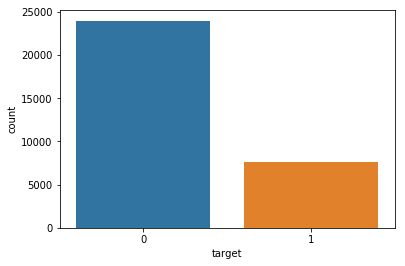

0    23968
1     7619
Name: target, dtype: int64


In [46]:

sns.countplot(x='target',data=i_data)
plt.show()

# What are the counts?
print(i_data.target.value_counts())


## Type Casting object to category 

In [47]:
for col in ['working_sector', 'qualification', 'marital_status', 'occupation', 'relationship', 'ethnicity', 'gender', 'country']:
    i_data[col] = i_data[col].astype('category')

In [48]:
i_data.dtypes

index                    int64
age                    float64
working_sector        category
financial_weight       float64
qualification         category
years_of_education       int64
tax_paid               float64
loan_taken               int64
marital_status        category
occupation            category
relationship          category
ethnicity             category
gender                category
gain                   float64
loss                   float64
working_hours          float64
country               category
target                   int64
dtype: object

## Splitting numerical and categorical coulmns of train data (i_data)

In [49]:
cat_attr = list(i_data.select_dtypes("category").columns)
num_attr = list(i_data.columns.difference(cat_attr))

print (cat_attr)
print("\n")
print(num_attr)
num_attr.pop(6)

['working_sector', 'qualification', 'marital_status', 'occupation', 'relationship', 'ethnicity', 'gender', 'country']


['age', 'financial_weight', 'gain', 'index', 'loan_taken', 'loss', 'target', 'tax_paid', 'working_hours', 'years_of_education']


'target'

## Handling Missing Values

In [50]:
i_data.isnull().sum()

index                     0
age                       2
working_sector         1775
financial_weight          2
qualification             2
years_of_education        0
tax_paid              29206
loan_taken                0
marital_status            0
occupation             1782
relationship              2
ethnicity                 2
gender                    2
gain                      2
loss                      2
working_hours             2
country                 568
target                    0
dtype: int64

In [51]:
print("Printing columns with missing values ")
print("\n")
missing_cols = i_data.columns[i_data.isnull().any()]
missing_cols

Printing columns with missing values 




Index(['age', 'working_sector', 'financial_weight', 'qualification',
       'tax_paid', 'occupation', 'relationship', 'ethnicity', 'gender', 'gain',
       'loss', 'working_hours', 'country'],
      dtype='object')

In [31]:
!pip install imblearn

## Machine Learning Pipeline 

In [52]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
# Doubt1: Imputation and Standardisation on the same step?

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])
# Row will be ignored

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_attr),
        ('cat', categorical_transformer, cat_attr)])